# Plan of Action

# Mount Google Drive & Imports

In [ ]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive') # force_remount = True

Mounted at /content/drive


In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
from zipfile import ZipFile
import time
from datetime import datetime
import itertools
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torchvision import datasets, transforms

import tensorflow as tf

# Setting random seeds to reduce the amount of randomness in the neural net weights and results
# The results may still not be exactly reproducible

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#@title Check for GPU

# Testing to ensure GPU is being utilized
# Ensure that the Runtime Type for this notebook is set to GPU
# If a GPU device is not found, change the runtime type under: Runtime>> Change runtime type>> Hardware accelerator>> GPU
# and run the notebook from the beginning again.

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Data Preparation

## Import Dataset

In [ ]:
'''#IMPORT CROPPED IMAGES

from google.colab import drive
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_cropped_images.zip'

# Destination directory where you want to extract the contents
extracted_dir_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/good_images'

# Create the destination directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Folder unzipped successfully.")'''

'#IMPORT CROPPED IMAGES\n\nfrom google.colab import drive\nimport zipfile\nimport os\n\n# Path to the zip file\nzip_file_path = \'/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_cropped_images.zip\'\n\n# Destination directory where you want to extract the contents\nextracted_dir_path = \'/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/good_images\'\n\n# Create the destination directory if it doesn\'t exist\nos.makedirs(extracted_dir_path, exist_ok=True)\n\n# Unzip the folder\nwith zipfile.ZipFile(zip_file_path, \'r\') as zip_ref:\n    zip_ref.extractall(extracted_dir_path)\n\nprint("Folder unzipped successfully.")'

In [ ]:
#IMPORT CELEBRITIES DICTIONARY

# Path to the Python file containing the dictionary
# celebs_path = {'nuria':}

py_file_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/celebrities.py'


# Read the Python file and save the code into a variable
with open(py_file_path, 'r') as file:
    code = file.read()

# Now you can execute the code to get the dictionary
exec_globals = {}
exec(code, exec_globals)

# Extract the dictionary from the executed code
celebrities_dict = exec_globals['celebrities']
print(celebrities_dict)

{'Channing Tatum': 1, 'Christina Applegate': 2, 'Richard E. Grant': 3, 'S. Epatha Merkerson': 4, 'Farah Fath': 5, 'Jim Beaver': 6, 'Cheryl Hines': 7, 'Michael Vartan': 8, 'Hayden Christensen': 9, 'Laurence Fishburne': 10, 'KathrinJoosten': 11, 'PatrickWarburton': 12, 'Jamie Lee Curtis': 13, 'Jason Judeikis': 14, 'Billy Burke': 15, 'Robert Pattinson': 16, 'Melissa Egan': 17, 'Morena Baccarin': 18, 'Jolene Blalock': 19, 'Matthew Lillard': 20, 'Alicia Goranson': 21, 'Jennie Garth': 22, 'Wanda De Jesus': 23, 'Tracey Bregman': 24, 'Tracey Gold': 25, 'Brendan Fraser': 26, 'Kellan Lutz': 27, 'John Travolta': 28, 'Pierce Brosnan': 29, 'Jasmine Guy': 30, 'Swoosie Kurtz': 31, 'Diego Luna': 32, 'Danny Glover': 33, 'David Cross': 34, 'Farrah Fawcet': 35, 'Paul Walker': 36, 'Matt Long': 37, 'Andy Garcia': 38, 'Casey Affleck': 39, 'Carla Gallo': 40, 'James Brolin': 41, 'Christian Bale': 42, 'Nadia Bjorlin': 43, 'Valerie Bertinelli': 44, 'Alec Baldwin': 45, 'Tamara Braun': 46, 'Andy Serkis': 47, 'Jac

## Resize images

In [ ]:
'''resized_folder_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_resized_imgs'
#folder_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/cropped_images/'
folder_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_cropped_images'
#M: vaig pujar la carpeta amb imatges cropped a mà, però no ho he executat encara. És la que es diu 'cropped_images'

if not os.path.exists(resized_folder_path):
    os.makedirs(resized_folder_path)

target_size = (50, 50)
# he fet resize a 50x50 pq n'he vist algunes de 53x53, per deixar un marge

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
        image_path = os.path.join(folder_path, filename)
        # Open the image
        img = Image.open(image_path)
        # Resize the image
        resized_img = img.resize(target_size, Image.ANTIALIAS)
        # Save the resized image to the new folder
        resized_img.save(os.path.join(resized_folder_path, filename))

print("Image resizing complete.")'''

'resized_folder_path = \'/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_resized_imgs\'\n#folder_path = \'/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/cropped_images/\'\nfolder_path = \'/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/new_cropped_images\'\n#M: vaig pujar la carpeta amb imatges cropped a mà, però no ho he executat encara. És la que es diu \'cropped_images\'\n\nif not os.path.exists(resized_folder_path):\n    os.makedirs(resized_folder_path)\n\ntarget_size = (50, 50)\n# he fet resize a 50x50 pq n\'he vist algunes de 53x53, per deixar un marge\n\nfor filename in os.listdir(folder_path):\n    if filename.endswith((\'.jpg\', \'.jpeg\', \'.png\')):  # Add more extensions if needed\n        image_path = os.path.join(folder_path, filename)\n        # Open the image\n        img = Image.open(image_path)\n        # Resize the image\n        resized_img = img.resize(target_size, Image.ANTIALIAS)\n        # Save the resized image to the new folder\

## Create dataframe that joins image paths with corresponding label

In [ ]:
from ast import Name

# IMPORTAR IMAGE_PATHS + LABELS
# M: He posat primer el resize, i despres aquí crear el dataframe

resized_folder_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/cropped_images'
input_path = resized_folder_path
# List all files in the folder
files = os.listdir(input_path)

# Initialize an empty list to store the image paths
image_paths = []
labels = []

# Iterate over the files in the folder
for file in files:
    # Check if the file is an image and does not contain '_augmented_' in the filename
    if (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png')) and '_augmented_' not in file:
        # Construct the full path to the image file
        image_path = os.path.join(input_path, file)

        # Append the image path to the list
        image_paths.append(image_path)

        # HE FET AIXO AIXI PERQ NHI HA QUE TENEN CROPPED AL NOM MES D'UNA VEGADA!!!!
        parts = file.split("_")
        name_index = None

        # Find the index where the name starts
        for i, part in enumerate(parts):
            if part.startswith("cropped"):
                continue
            else:
                name_index = i
                break

        # Extract the name from the parts
        name = parts[name_index]

        labels.append(celebrities_dict[name])

# Create a DataFrame with the image paths
df = pd.DataFrame({'image_path': image_paths, "id": labels})
df = df.astype({'id': int})

print('Dataframe correctly created.')

Dataframe correctly created.


In [ ]:
df[df.id == 75].head()

,image_path,id
1235,/content/drive/MyDrive/Analisi Gestos i Cares/...,75
1236,/content/drive/MyDrive/Analisi Gestos i Cares/...,75
1237,/content/drive/MyDrive/Analisi Gestos i Cares/...,75
1238,/content/drive/MyDrive/Analisi Gestos i Cares/...,75
1239,/content/drive/MyDrive/Analisi Gestos i Cares/...,75


In [ ]:
print('Number of images =', len(df.image_path))
df.id.value_counts()

Number of images = 2693


80    48
51    48
53    45
77    45
28    45
      ..
44    23
71    23
73    21
24    19
65    17
Name: id, Length: 80, dtype: int64

## Divide into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['image_path'], df['id'],test_size = 0.15,random_state = 42, stratify=df['id'])

print(x_train.iloc[0])

/content/drive/MyDrive/Analisi Gestos i Cares/model/Data/cropped_images/cropped_Chris Kattan_1.jpg


## Dataloader


In [ ]:
# Converting the filenames and target class labels into lists for augmented train and test datasets.
train_filenames_list = list(x_train)
train_labels_list = list(y_train)

test_filenames_list = list(x_test)
test_labels_list = list(y_test)

train_labels_list = [label - 1 for label in train_labels_list]
test_labels_list = [label - 1 for label in test_labels_list]

TRAIN DATASET EXAMPLES
Feature batch shape: torch.Size([250, 1, 96, 96]) --> [num_images, channels, width, height]
Labels batch shape: torch.Size([250])


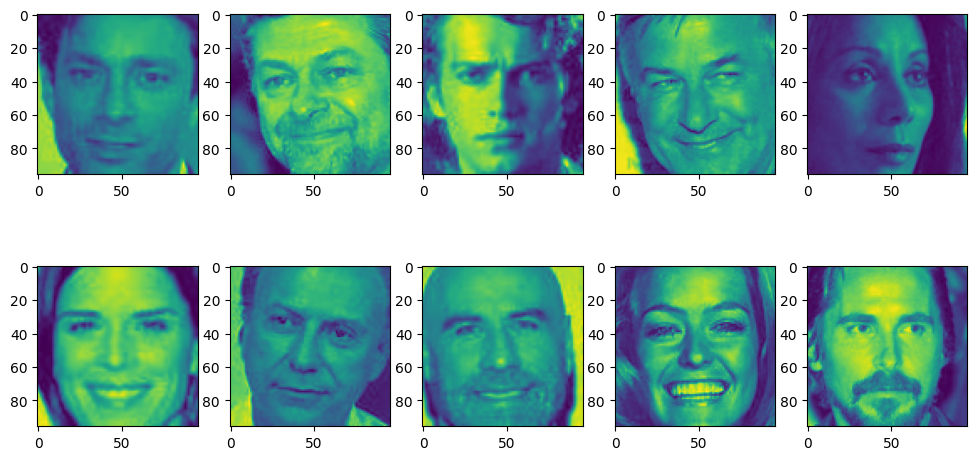

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tf
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io as sio
from google.colab import drive
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.labels[index]

        image = Image.open(image_path).convert('RGB') #########

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.Resize((96, 96)),  # Resize the image to a specific size
    transforms.Grayscale(),
    # transforms.CenterCrop(150),
    transforms.ToTensor()  # Convert image to tensor
])


#Assign keys
class_labels = celebrities_dict.values()
class_labels_map = {}


# Create the custom dataset
train_dataset = CustomDataset(train_filenames_list, train_labels_list, transform=transform)

# Create the dataloader
train_loader = DataLoader(train_dataset, batch_size=250, shuffle=False) #PROVAR AUGMENTAR BACTHSIZE

# Create the custom dataset
test_dataset = CustomDataset(test_filenames_list, test_labels_list, transform=transform)

# Create the dataloader
test_loader = DataLoader(test_dataset, batch_size=250, shuffle=False) #PROVAR AUGMENTAR BACTHSIZE

print('TRAIN DATASET EXAMPLES')
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()} --> [num_images, channels, width, height]")
print(f"Labels batch shape: {train_labels.size()}")
indx = 0
f, axarr = plt.subplots(2, 5, figsize=(12, 6))
for r in range(0, 2):
  for c in range(0, 5):
    img = train_features[indx].squeeze()
    label = train_labels[indx]
    axarr[r, c].imshow(transforms.ToPILImage()(img))
    axarr[r, c].set_title(class_labels_map.get(str(label.item())))
    indx+=1


# CNN Architecture

In [ ]:
results_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/output_m'


#Train function with accumulation steps to try to reduce the running time
def train(CNN, train_loader,test_loader,optimizer, num_epochs=5, model_name='model.ckpt', device='cpu', accumulation_steps=10):
  print('Training the CNN')
  CNN.train() # Set the model in train mode
  total_step = len(train_loader)
  losses_list = []
  losses_list_test = []
  w = [1]*80
  class_weights = torch.Tensor(w).to(device)

  criterion = nn.CrossEntropyLoss() # weight=class_weights

  # Iterate over epochs
  for epoch in range(num_epochs):
      print('epoch', epoch)
      loss_avg = 0
      nBatches = 0
      accumulation_loss = 0

      # Iterate over batches
      for i, (images, labels) in enumerate(train_loader):
          images = images.to(device)
          labels = labels.to(device)

          # Forward pass
          outputs = CNN(images)
          loss = criterion(outputs, labels)

          # Backward pass
          loss.backward()

          # Accumulate gradients
          accumulation_loss += loss.item()

          if (i + 1) % accumulation_steps == 0:
              optimizer.step()
              optimizer.zero_grad()
              loss_avg += accumulation_loss / accumulation_steps
              accumulation_loss = 0
              nBatches += 1

              if (i + 1) % 100 == 0:
                  print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                      epoch + 1, num_epochs, i + 1, total_step, loss_avg / nBatches))

      torch.cuda.empty_cache()

      # Perform the final update if there are remaining accumulated gradients
      if accumulation_loss > 0:
          optimizer.step()
          optimizer.zero_grad()
          loss_avg += accumulation_loss / accumulation_steps
          nBatches += 1

      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
          epoch + 1, num_epochs, i + 1, total_step, loss_avg / nBatches))

      # aqui fer el tsting
      accuracy, loss_test = test(CNN, test_loader,criterion)
      losses_list_test.append(loss_test.item())
      losses_list.append(loss_avg / nBatches)
      torch.save(CNN.state_dict(), results_path + '/' + model_name)

      print("Epoch",epoch,"loss",loss_avg / nBatches,"loss_val",loss_test.item(),"Accuracy_test",accuracy)

  return losses_list,losses_list_test


# Test funcion
def test(CNN, test_loader,criterion):
  with torch.no_grad():
        correct = 0
        total = 0
        total_loss = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # get network predictions
            outputs = CNN(images)

            # get predicted class
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            # compare with the ground-truth
            total_loss += loss
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # return accuracy
        return 100 * correct / total, total_loss/len(test_loader)

In [ ]:
import torch.nn as nn
class delivered_ReducedIdEstimationModel(nn.Module): # delivered for lab 4
    #Python/reduced_80epochs_batch400_resize150_conv64.ckpt
    #Python/reduced_100epochs_batch400_resize150_conv64.ckpt
    def __init__(self, num_classes):
        super(delivered_ReducedIdEstimationModel, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1), # kernel 5 o 7, padding 2 o 3
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2), # 48
            nn.Conv2d(16, 32, kernel_size=3, padding=1), # 48
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2), # 24
            # Removed one Conv2d layer to reduce parameters
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 24
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=2, stride=2), # conv mantenint canals kernel 3 # 12
            nn.AvgPool2d(kernel_size=2, stride=2) # 6
        )

        self.classifier = nn.Sequential(
            nn.Linear(64 * 6 * 6, 128),  # Corrected input size based on the last layer's output
            nn.ReLU(inplace=True), # ?
            nn.Dropout(p=0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

class batchnorm_ReducedIdEstimationModel(nn.Module):
    def __init__(self, num_classes):
        super(batchnorm_ReducedIdEstimationModel, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=7, padding=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.Dropout2d(0.1),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Dropout2d(0.2),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Dropout2d(0.3),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.1),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),
            nn.Dropout2d(0.2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(128 * 6 * 6, 128),
            nn.Linear(128, num_classes)
        )



results_path = '/content/drive/MyDrive/Analisi Gestos i Cares/model/output_m'


#Train function with accumulation steps to try to reduce the running time
def train(CNN, train_loader,test_loader,optimizer, num_epochs=5, model_name='model.ckpt', device='cpu', accumulation_steps=10):
  print('Training the CNN')
  CNN.train() # Set the model in train mode
  total_step = len(train_loader)
  losses_list = []
  losses_list_test = []
  w = [1]*80
  class_weights = torch.Tensor(w).to(device)

  criterion = nn.CrossEntropyLoss() # weight = class_weights

  # Iterate over epochs
  for epoch in range(num_epochs):
      loss_avg = 0
      nBatches = 0
      accumulation_loss = 0

      # Iterate over batches
      for i, (images, labels) in enumerate(train_loader):
          images = images.to(device)
          labels = labels.to(device)

          # Forward pass
          outputs = CNN(images)
          loss = criterion(outputs, labels)

          # Backward pass
          loss.backward()

          # Accumulate gradients
          accumulation_loss += loss.item()

          if (i + 1) % accumulation_steps == 0:
              optimizer.step()
              optimizer.zero_grad()
              loss_avg += accumulation_loss / accumulation_steps
              accumulation_loss = 0
              nBatches += 1

              if (i + 1) % 100 == 0:
                  print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                      epoch + 1, num_epochs, i + 1, total_step, loss_avg / nBatches))

      torch.cuda.empty_cache()

      # Perform the final update if there are remaining accumulated gradients
      if accumulation_loss > 0:
          optimizer.step()
          optimizer.zero_grad()
          loss_avg += accumulation_loss / accumulation_steps
          nBatches += 1

      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
          epoch + 1, num_epochs, i + 1, total_step, loss_avg / nBatches))

      # aqui fer el tsting
      accuracy, loss_test = test(CNN, test_loader,criterion)
      losses_list_test.append(loss_test.item())
      losses_list.append(loss_avg / nBatches)
      torch.save(CNN.state_dict(), results_path + '/' + model_name)

      print("Epoch",epoch,"loss",loss_avg / nBatches,"loss_val",loss_test.item(),"Accuracy_test",accuracy)

  return losses_list,losses_list_test


# Test funcion
def test(CNN, test_loader,criterion):
  with torch.no_grad():
        correct = 0
        total = 0
        total_loss = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            # get network predictions
            outputs = CNN(images)

            # get predicted class
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            # compare with the ground-truth
            total_loss += loss
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        # return accuracy
        return 100 * correct / total, total_loss/len(test_loader)



In [ ]:
num_classes = len(celebrities_dict.keys())
# print(num_classes)

#Train MyModel
red_id_model = batchnorm_ReducedIdEstimationModel(num_classes)

#Initialize optimizer
learning_rate = .001
optimizer = torch.optim.Adam(red_id_model.parameters(), lr=learning_rate, weight_decay=0.09)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
red_id_model = red_id_model.to(device)
losses_list1,losses_list_test = train(red_id_model, train_loader,test_loader, optimizer, num_epochs=250, model_name='batchnorm_k7conv_250epochs_batch250.ckpt', device=device)

print('Number of parameters:', sum(p.numel() for p in red_id_model.parameters()))

Training the CNN
Epoch [1/250], Step [10/10], Loss: 4.4514
Epoch 0 loss 4.451369333267212 loss_val 4.182927131652832 Accuracy_test 4.702970297029703
Epoch [2/250], Step [10/10], Loss: 4.1325
Epoch 1 loss 4.132537770271301 loss_val 4.0169572830200195 Accuracy_test 8.168316831683168
Epoch [3/250], Step [10/10], Loss: 3.8620
Epoch 2 loss 3.862027716636658 loss_val 3.862718105316162 Accuracy_test 9.653465346534654
Epoch [4/250], Step [10/10], Loss: 3.6126
Epoch 3 loss 3.612615370750427 loss_val 3.7079031467437744 Accuracy_test 15.346534653465346
Epoch [5/250], Step [10/10], Loss: 3.4042
Epoch 4 loss 3.4042425632476805 loss_val 3.531651496887207 Accuracy_test 16.831683168316832
Epoch [6/250], Step [10/10], Loss: 3.1638
Epoch 5 loss 3.163843512535095 loss_val 3.3479323387145996 Accuracy_test 18.81188118811881
Epoch [7/250], Step [10/10], Loss: 2.9312
Epoch 6 loss 2.9311912655830383 loss_val 3.18877911567688 Accuracy_test 24.752475247524753
Epoch [8/250], Step [10/10], Loss: 2.7139
Epoch 7 lo

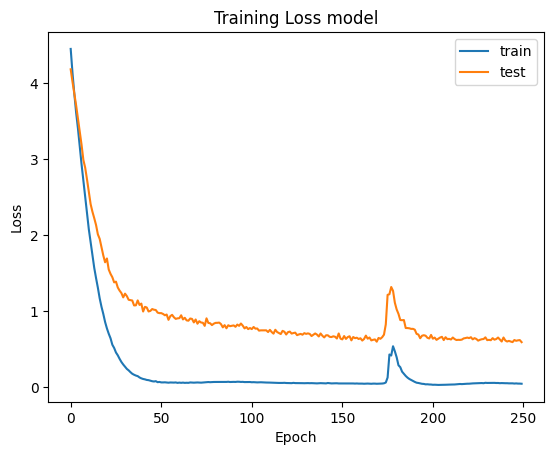

In [ ]:
plt.plot(losses_list1,label="train")
plt.plot(losses_list_test,label="test")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss model')
plt.show()